# Исследование рынка кинопроката

**Цель проекта** - выявить текущие тренды российского кинопроката.

**Задача** - провести анализ рынка кинопроката, выявить текущие тренды. Ответить на вопрос, насколько зрителю интересны фильмы, которые получили государственную поддержку.

**Описание данных**


Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта `КиноПоиск`.

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

## Загрузка данных

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv('mkrf_movies.csv')

In [3]:
df_2= pd.read_csv('mkrf_shows.csv')

Нам необходимо соединить фреймы, мы сделаем это по общему столбцу `puNumber`. Для начала нам нужно убедиться что `puNumber` имеет одинаковый тип и не содержит значений которые могут помешать соединению. 

In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Мы видим что столбцы `puNumber` имеют разные типы. 

In [6]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


С первого взгляда видно что `puNumber` в файле `mkrf_movies.csv` имеет строковое значение состоящее из 9 символов. Возможно такое количество символов имеют подавляющее количество строк. Проверим это, а если есть что то, что не соответствует этому количеству и как следствие может помешать нам объединить столбцы, мы увидим эти значения.

In [7]:
get_len = lambda x: len(x) if len(x) == 9 else x

In [8]:
df['puNumber'].apply(get_len).unique()

array([9, ' 111004112', 'нет', '1811096'], dtype=object)

Как и предполагалось большинство строк имеют 9 символов в своем составе. А также мы видим пробел в одной строке и значение `'нет'`. Необходимо устранить эти значения, так как они могут вызвать непредвиденное поведение в ходе работы.

Удаляем пробелы в строках

In [9]:
df['puNumber'] = df['puNumber'].apply(lambda x: x.strip())

Заменяем значение 'нет' на NaN, так как с ним проще работать и NaN игнорируется большинством функций.

In [10]:
df['puNumber'] = df['puNumber'].apply(lambda x: np.nan if x == 'нет' else x)

Приводим столбец к типу `int` для корректного объединения, мы будем использовать целые числа для избежания непредвиденного поведения. Перед приведением мы удалим 1 строку из фрейма так как она содержит пустое значение `NaN`, что не позволит нам привести столбец к типу `int`.

In [11]:
df['puNumber'] = pd.to_numeric(df['puNumber'], errors= 'coerce');

Объединяем фреймы

In [12]:
df = df.join(df_2.set_index('puNumber'), on='puNumber')

In [13]:
df.query('~box_office.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2.700000e+03
18,Неподдающиеся,111003616.0,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",3.600000e+02
19,Неподсуден,111003716.0,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,4.200000e+02
22,"Операция ""Ы"" и другие приключения Шурика",111007413.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",3.800000e+02
38,Мужики!..,111007213.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1.165000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019.0,2019-12-26T12:00:00.000Z,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019.0,2019-12-20T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7471,Реальная любовь в Нью-Йорке,121038219.0,2019-12-19T12:00:00.000Z,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,драма,3.143790e+06
7472,Черное Рождество,121038319.0,2019-12-19T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.9,"ужасы,триллер,детектив",1.800177e+07


Выключаем научную нотацию

In [14]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

**В ходе работы мы удалили пробелы из столбца `puNumber`, удалили значения которые не соответсвуют формату, объединили два фрема. Теперь мы имеем один фрейм который готов для дальнейшей обработки и анализа.**

## Предобработка данных

### Типы

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Преобразуем тип столбца `show_start_date` в тип `datatime`

Столбец `show_start_date` содержит дату публикации объявления. Столбец имеет тип `object`, данные записаны в формате `2016-06-10T12:00:00.000Z`. Необходимо изменить тип данных так как строка содержащая дату не может обеспечить функционал объекта datetime, с ней неудобно работать. Есть подозрение, что время в каждой ячейке одинаково `12:00:00.000Z`, если это так, то следует удалить эту часть строки и после этого назначить столбцу тип `datetime`.

Разделяем строку по символу `T`

In [17]:
unique_time = df['show_start_date'].str.split('T')

Удаляем из получившегося списка все строки `12:00:00.000Z`. Если там присутствуют отличающиеся значения от `12:00:00.000Z` то будет выведено сообщение об ошибке.

In [18]:
try:
    
     result = [ item.remove('12:00:00.000Z') for item in unique_time]
        
        #проходим по списку и удаляем все значения соотвествующие шаблону
        
        #если значение не соответсвует шаблону то фенкция remove возбудит исключение
        
except: 
    
    print('Sorry! list can contain unexpected value please cheack it')

Перезаписываем столбец в новом формате.

In [19]:
df['show_start_date'] = [item[0] for item in unique_time]

Изменили тип солбца на `datetime`.

In [20]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')

--------

Столбец `ratings` имеет тип `object`, будет правильно привести его к типу `float`, так как содержащиеся в столбце данные, в подавляющих случаях выражается, в формате десятичной дроби, таким образом работать с такими данными удобнее, когда они имеют соответствующий своей природе тип. Также было обнаружено, что некоторые данные выражаются в процентах, это следует исправить и привести все данные к одному виду.

In [21]:
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Удаляем знак %

In [22]:
concat = lambda col: ''.join(col.split('%')) if type(col) == str else col # поиск и удаление (%)

In [23]:
df['ratings'] = df['ratings'].apply(concat)

In [24]:
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

Приводим к типу `float`

In [25]:
df.ratings = df.ratings.astype('float')

In [26]:
df.ratings.unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

Разделим все выбивающиеся значения на `10` для получения адекватных значений.

In [27]:
df.loc[df.ratings > 10, 'ratings'] = df[df.ratings > 10].ratings / 10

In [28]:
df.ratings.unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

**В данном пункте мы изменили тип данных столбца `show_start_date` на `datatime`. Также мы привели все значения ratings к одному внешнему виду, изменили его тип на float.**

### Пропуски

In [29]:
df.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Было решено заполнить пропуски только в столбце `ratings`, так как в остальных столбцах мы имеем незначительное количество пропусков, либо они не влияют на выполнение наших задач. Для заполнения `ratings`, мы предварительно сгруппируем данные по столбцу `type`, возьмем медиану каждой группы и вставим вместо пропущенных значений.

In [30]:
for name, group in df.query('~ratings.isna()').groupby('type')['ratings']:
    
        #Выбрали все значения ratings не рано nan, для дальнейшего вычисления медианы
        
        #Сгруппировали по type выбрав ratings
        
    
    df.loc[(df.ratings.isna()) & (df.type == name), 'ratings'] = group.median()
    
        #записали медиану вместо пропуска 
   

###  Дубликаты

Явных дубликатов не обнаружено

In [31]:
df.duplicated().sum()

0

В столбце `type` присутствуют значения с лишними пробелами и буквы в верхнем регистре. Такие проблемы присутствуют и в других столбцах, этот факт способен вызвать  неявные дубликаты в категориальных столбцах и влиять при этом на подсчеты таким образом создается новая категория. Приведем столбец `type` в порядок, значения запишем в нижнем регистре и удалим лишние пробелы.

In [32]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [33]:
df['type'] = df['type'].apply(lambda x: str.lower(x.strip()) if type(x) == str else x)

In [34]:
df['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

Столбец production_country требует отдельной обработки, удалим лишние пробелы `' - '` заменив их на `'-'`. А также `', '` заменим на `'-'`

In [35]:
concat = lambda col: '-'.join(col.split(' - ')) if type(col) == str else col

In [36]:
df['production_country'] = df['production_country'].apply(concat)

In [37]:
concat = lambda col: '-'.join(col.split(', ')) if type(col) == str else col

In [38]:
df['production_country'] = df['production_country'].apply(concat)

In [39]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР-Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'Новая Зеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия-Казахстан-США', 'СССР-Швеция',
       'СССР-Франция-Англия-Куба-ГДР', 'Германия',
       'Великобритания-США-Германия-КНР', 'СССР-ЧССР-Западный Берлин-ПНР',
       'СССР-Италия', 'Гонконг-КНР', 'США-Франция',
       'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР-Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобритания-Франция-США', 'Новая Зеландия-

In [40]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7485 non-null   float64       
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [42]:
df['puNumber'].isna().sum()

1

Был обнаружен один дубликат в столбце `puNumber`. Удалять этот дубликат нет смысла, так как несмотря на то, что он является явным и находится в категориальном столбце, все остальные данные в строке являются уникальными. Группировать по столбцу  `puNumber` мы не будем так как такая группировка лишена  смысла. Сам дубликат при анализе будет восприниматься в любом случае как единица данных.

In [43]:
df['title'].isna().sum()

0

**В данно части работы мы избавились от неявных дубликатов в столбце `type`, `production_country`. Также мы проверили фрейм на наличие явнях дубликатов.**

### Подозрительные данные

В колонке `box_office` видны нулевые значения, это странно, так как прокат был, а сборы нулевые.

In [44]:
df.query('~box_office.isna()').box_office.min()

0.0

Видны также подозрительно низкие значения, что тоже наводит на мысль о том что в сете содержатся недостоверные данные.

In [45]:
df.query('box_office < 20000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18,художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",2700
18,Неподдающиеся,111003616,2016-02-12,художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",360
19,Неподсуден,111003716,2016-02-12,художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,420
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18,художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9,"комедия,мелодрама,криминал",380
38,Мужики!..,111007213,2013-10-18,художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,ШПИОН,111009411,2011-12-09,художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"боевик,комедия,криминал",5405
5388,ВОИН.com,111004411,2011-07-04,художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5,комедия,465
5389,Кунг-фу Панда 2.,224021411,2011-11-15,анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7,"мультфильм,фэнтези,боевик",9270
6581,Время собирать цветы,112025118,2019-01-01,документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,NaN,7175


Мы видим нулевые бюджеты при том что присутствует государственная поддержка, это также странно.

In [46]:
df.query('(refundable_support > 0 or nonrefundable_support > 0) and budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",7,мелодрама,10234016
2058,Дуxless 2,111000415,2015-01-26,художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,7,драма,446163511
2472,Воин (2015),111017315,2015-09-28,художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,8,"боевик,драма,криминал",196572438
2532,Бармен.,111009615,2015-05-26,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6,"комедия,фэнтези",67418975
2615,Савва. Сердце воина,114001715,2015-07-21,анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,5,"мультфильм,приключения,фэнтези",184487551
2684,Тряпичный союз,111010215,2015-06-08,художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6,"комедия,драма",1957739
2788,Срочно выйду замуж,111017115,2015-09-30,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5,"комедия,мелодрама",72937783
2874,Помню - не помню!,111004916,2016-03-01,художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4,комедия,15362931
3047,Любовь с ограничениями,111008216,2016-04-29,художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6,"комедия,мелодрама",70299052
3565,Притяжение (2016),111018116,2016-12-16,художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,6,фантастика,1038321489


**В данной ччасти работы были обнаружены подозрительные значения, в случае необходимости лучше фильтровать такие данные для того, чтобы, эти значения не искажали картину.**

------

### Новые столбцы

Добавим столбец с годом примьеры

In [47]:
df['year'] = df['show_start_date'].dt.year

Добавим столбец с именем и фамилией главного режиссера

In [48]:
concat = lambda name: name.split(', ')  if type(name) == str else name

In [49]:
def get_general(name):
    
    list_name = concat(name)
    try:
        return list_name[0]
    except: 
        return name

In [50]:
df['general_director'] = df['director'].apply(get_general)

Добавим столбец с главным жанром

In [51]:
concat = lambda name: name.split(',')  if type(name) == str else name

In [52]:
df['general_genre'] = df['genres'].apply(get_general)

Добавим столбец с долей господдержки

In [53]:
df.query('~budget.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,general_director,general_genre
1281,Пока еще жива,111005313,2013-10-11,художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8,"драма,мелодрама",365354,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28,художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,7,NaN,28140,2014,А.Якимчук,NaN
1498,Невидимки,111004213,2013-09-10,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5,"комедия,фантастика",19957032,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05,художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4,драма,55918,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,111004414,2014-04-23,художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6,драма,232100,2014,М.Угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6,"история,биография,драма",717703186,2019,А.Кравчук,история
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,7,"мультфильм,приключения,семейный",501069235,2019,Д.Шмидт,мультфильм
7474,Вторжение,111022519,2019-12-23,художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,6,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика
7476,Я свободен,111023019,2019-12-26,художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,6,драма,NaN,2019,И.Северов,драма


Вычисляем долю

In [54]:
df['gover_support'] = round((df['refundable_support'] + df['nonrefundable_support']) / df['budget'],2)

In [55]:
df['gover_support'].unique()

array([ nan, 0.33, 0.7 , 0.61, 0.69, 0.62, 0.48, 0.68, 0.54, 0.35, 0.28,
       0.37,  inf, 0.5 , 0.13, 0.63, 0.66, 0.67, 0.21, 0.12, 0.41, 0.25,
       0.39, 0.53, 0.22, 0.34, 0.43, 0.36, 0.65, 0.18, 0.32, 0.6 , 0.64,
       0.3 , 0.56, 0.59, 0.17, 0.51, 0.1 , 0.23, 0.44, 0.38, 0.31, 0.47,
       0.16, 0.78, 0.45, 0.52, 0.27, 0.49, 0.55, 0.24, 0.07, 0.29, 0.46,
       0.04, 0.57, 0.42, 0.2 , 0.26, 0.58, 0.08, 0.09])

Заменяем значение inf на NaN

In [56]:
df.loc[df.gover_support == np.inf, 'gover_support'] = np.nan

In [57]:
df['gover_support'].unique()

array([ nan, 0.33, 0.7 , 0.61, 0.69, 0.62, 0.48, 0.68, 0.54, 0.35, 0.28,
       0.37, 0.5 , 0.13, 0.63, 0.66, 0.67, 0.21, 0.12, 0.41, 0.25, 0.39,
       0.53, 0.22, 0.34, 0.43, 0.36, 0.65, 0.18, 0.32, 0.6 , 0.64, 0.3 ,
       0.56, 0.59, 0.17, 0.51, 0.1 , 0.23, 0.44, 0.38, 0.31, 0.47, 0.16,
       0.78, 0.45, 0.52, 0.27, 0.49, 0.55, 0.24, 0.07, 0.29, 0.46, 0.04,
       0.57, 0.42, 0.2 , 0.26, 0.58, 0.08, 0.09])

**В ходе работы над данным пунктом были добавлены новые столбцы содержащие год выхода фильма, фамилию режиссера, жанр и долю господдержки.**

## Анализ данных

Ниже количество фильмов которые выходили в прокат по годам.

In [58]:
df.groupby('year')['box_office'].count()

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

Доля фильмов с указанной информацией о прокате в кинотеатрах, составляет `0.42`. Мы принимаем во внимание абсолютно все значения, даже нулевые.

In [59]:
round(df.query('~box_office.isna()').box_office.shape[0] / df.shape[0], 2)

0.42

Далее получим в процентах, долю фильмов с указанной информацией для каждого года, затем построим график. Посмотрим как доля менялась по годам

Строим сводную по количество фильмов по году и количество фильмов по году для которых есть информация о прокате.

In [60]:
pivot = df.pivot_table(index='year', values=['box_office', 'puNumber'], aggfunc=['count'])

In [61]:
pivot.columns = ['box_office','total_films']

Вычисляем долю в процентах

In [62]:
pivot['share_box_office'] = pivot['box_office']/(pivot['total_films'] / 100)

In [63]:
pivot[' '] = '%'

In [64]:
pivot

,box_office,total_films,share_box_office,
year,,,,
2010,105,985,11,%
2011,109,622,18,%
2012,128,593,22,%
2013,184,630,29,%
2014,279,806,35,%
2015,465,705,66,%
2016,526,818,64,%
2017,357,505,71,%
2018,475,891,53,%


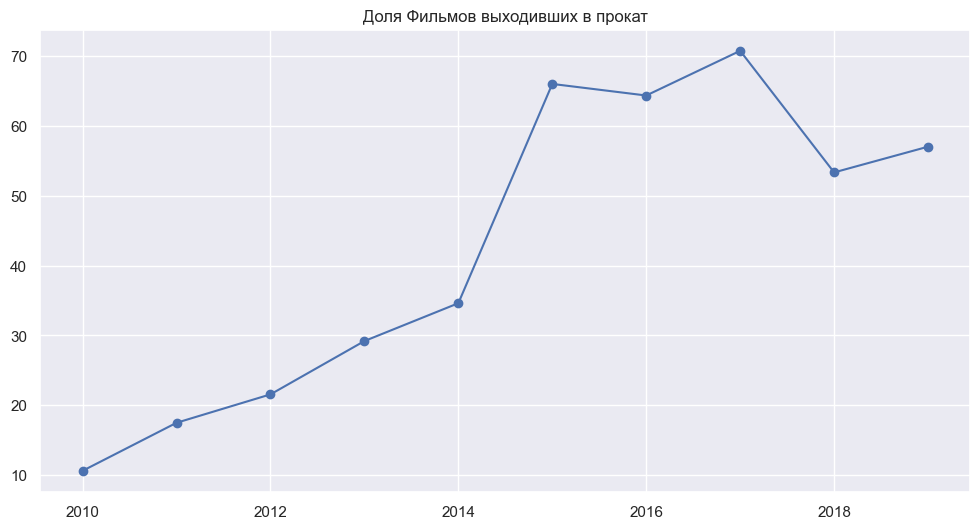

In [65]:
pivot.share_box_office.plot(figsize=(12, 6),style='-o',title='Доля Фильмов выходивших в прокат', xlabel='');

На графике видно что доля фильмов с указанными данными о прокате плавно росла с `2010` года по `2014`, далее мы видим резкий скачек вверх с `35%` до `66%` в `2017` году. Резкий спад наблюдается в `2018` с `70` до `53%`  

Полнее представлен, это значит имеет больше данных для анализа. Самое большое количество данных у нас в `2019` году, в прокат вышло `516` фильмов.

---------------

Построим сводную таблицу по сумме сборов по годам

In [66]:
amount_pivot = df.pivot_table(index='year', values=['box_office'], aggfunc=['sum'])

Изменим имя солбца

In [67]:
amount_pivot.columns = ['sum_box_office']

`amount_pivot`

Минимальная сумма сборов в `2010` году, максимальная в `2018` году.

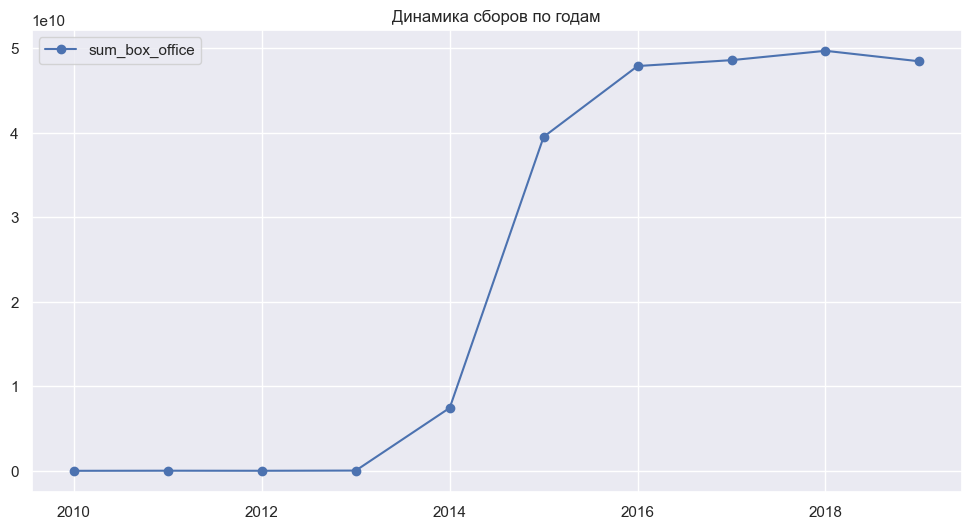

In [68]:
amount_pivot.plot(figsize=(12, 6),style='-o',title='Динамика сборов по годам', xlabel='');

In [69]:
amount_pivot

,sum_box_office
year,
2010,2428654
2011,14102765
2012,6955423
2013,29799706
2014,7444951859
2015,39497365196
2016,47866299742
2017,48563707218
2018,49668403134


По графику видно динамику роста. В сводной таблице выше можем увидеть минимальную и максимальную сумму сборов.

----------

Построим сводную в которой будут находится средние и медианные значения по годам

In [70]:
average_pivot = df.pivot_table(index='year', values=['box_office'], aggfunc=['mean','median'])

Меняем название столбцов

In [71]:
average_pivot.columns =['mean_box_office','median_box_office']

In [72]:
average_pivot

,mean_box_office,median_box_office
year,,
2010,23130,1700
2011,129383,3000
2012,54339,5660
2013,161955,3522
2014,26684415,18160
2015,84940570,4920933
2016,91000570,3846679
2017,136032793,9968340
2018,104565059,8891102


Как отмечалось выше в столбце `box_office` находятся нулевые значения а также подозрительно маленькие значения. Было решено отфильтровать такие значения и построить сводную снова.

In [73]:
q = df.query('~box_office.isna()').box_office.quantile(0.2)

In [74]:
average_pivot = df.query('box_office > @q').pivot_table(index='year', values=['box_office'], aggfunc=['mean','median'])

In [75]:
average_pivot.columns =['mean_box_office','median_box_office']

In [76]:
average_pivot

,mean_box_office,median_box_office
year,,
2010,194402,42330
2011,764539,57970
2012,209612,54265
2013,731200,60740
2014,54737368,631810
2015,90798296,6929900
2016,96504298,4793164
2017,136414886,10177834
2018,104565059,8891102


Видно что цифры заметно изменились.

----------

**Влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?**

Для решения было принято создать новый столбец на основании столбца `age_restriction`, новый столбец будет содержать более короткие обозначения возрастной категории. Также мы будем проводить анализ на основе данных очищенных от выбросов так, как мы сделали это выше. Мы фильтруем нулевые значения и слишком маленькие значения в столбце `box_office`, для получения более реалистичной картины.

Создаем новый столбец

In [77]:
age_rstrcn = {
              '«18+» - запрещено для детей':'18+', 
              
              '«6+» - для детей старше 6 лет':'6+',
              
              '«12+» - для детей старше 12 лет':'12+',
              
              '«16+» - для детей старше 16 лет':'16+',
              
              '«0+» - для любой зрительской аудитории':'0+'
             }

In [78]:
df['age_rstrcn'] = df['age_restriction'].map(lambda x: age_rstrcn[x])

Создаем сводную по данным в `box_office` начиная с `2015` по `2019` года, группируем по возрастным ограничениям и выводим медиану и количество значений из которых взята медиана.

In [79]:
pivot_age_restriction = df.query('box_office > @q and year >= 2015').pivot_table(index=['age_rstrcn'], values=['box_office'], aggfunc=['median','count'])

In [80]:
pivot_age_restriction.columns = ['median_box_office', 'count_films']

In [81]:
pivot_age_restriction

,median_box_office,count_films
age_rstrcn,,
0+,3237332,82
12+,8425368,333
16+,6102750,790
18+,6392023,782
6+,18217830,303


Построим график

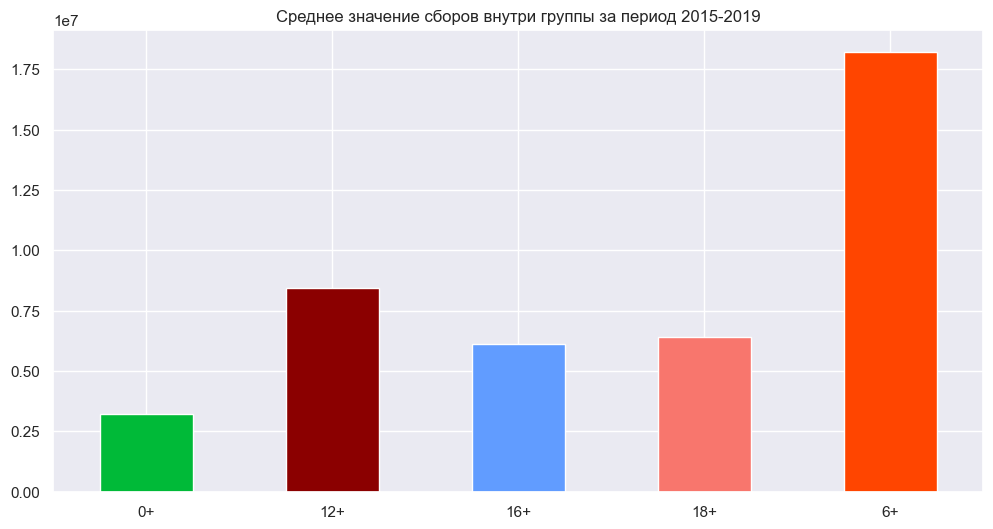

In [82]:
colors = ["#00ba38", "#8B0000", "#619cff", "#f8766d", "#FF4500"]
pivot_age_restriction.median_box_office.plot(kind='bar', figsize=(12, 6),color = colors, rot=False, xlabel='',title='Среднее значение сборов внутри группы за период 2015-2019');

На графике видно что за весь период с `2015`по `2019` год самое большое среднее значение кассовых сборов наблюдается у категории `6+`. Таким образом мы видим влияние возрастной категории на сумму сборов, об этом нам говорит, разницу средних значений на графике.

----------

**Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?**

Создаем сводную по данным в `box_office` начиная с `2015` по `2019` года, группируем по возрастным ограничениям и выводим сумму по каждой группе.

In [83]:
pivot_age_sum = df.query('box_office > @q and year >= 2015').pivot_table(index=['age_rstrcn'], values=['box_office','puNumber'], aggfunc={'box_office':'sum','puNumber':'count'})

In [84]:
pivot_age_sum.columns = ['sum_box_office','count_puNumber']

In [85]:
pivot_age_sum

,sum_box_office,count_puNumber
age_rstrcn,,
0+,809064456,82
12+,60619357403,333
16+,76034672846,790
18+,40759534187,782
6+,55798561511,303


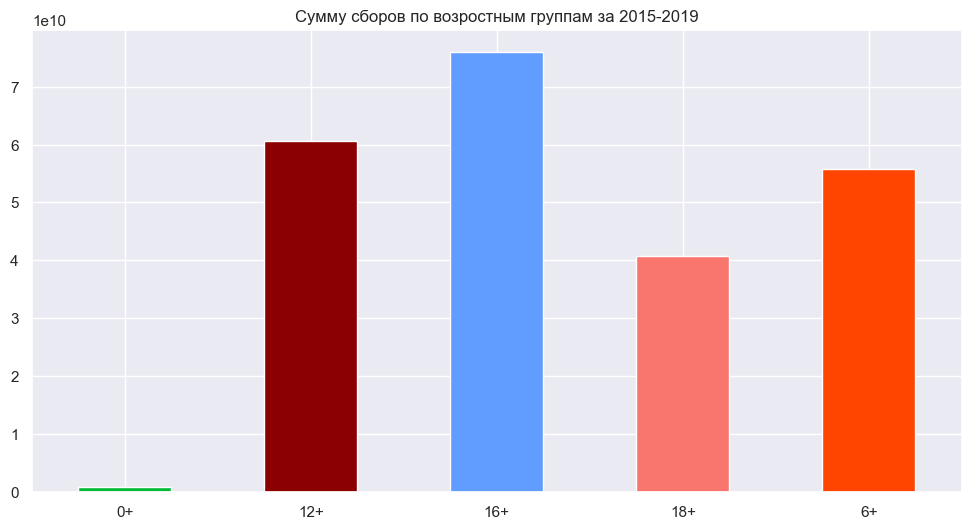

In [86]:
colors = ["#00ba38", "#8B0000", "#619cff", "#f8766d", "#FF4500"]
pivot_age_sum.sum_box_office.plot(kind='bar', figsize=(12, 6),color = colors, rot=False, xlabel='',title='Cумму сборов по возростным группам за 2015-2019');

По графику видно что больше всего денег за период с `2015` по `2019` год собрали фильмы с возрастным ограничением `16+`

-------

**Меняется ли картина в зависимости от года?**

Для описания картины по каждому году было решено создать функцию. Функция будет выводить сводную по каждому году и строить график.

Функция состоит из двух частей, первая часть это словарь который хранит в себе параметры для настройки сводной таблицы и графика. Вторая часть функции это сама функция реализующая необходимый функционал.

In [87]:
args_for_pivot = {
                  'query':{
                                'target_col': None, # data for calculations
                                'quantile':   None, # cutoff quantile
                                'year':       None  # period
                      },
                  
                  'pivot_table':{
                                    'idx':    None, # arg index
                                    'vals':   None, # arg value
                                    'func':   None  # mentod for arg aggfunc
                      },
    
                  'plot':{
                              'title':        None  # name of plot 
                      
                      }
                 }


In [88]:
def get_insight(args_for_pivot, df):
    
    q_target_col   =      args_for_pivot['query']['target_col'] # data for calculations
    
    q_quant        =      args_for_pivot['query']['quantile']   # cutoff quantile
    
    q_year         =      args_for_pivot['query']['year']       # period
    
    
    p_index        =      args_for_pivot['pivot_table']['idx']  # arg index
    
    p_value        =      args_for_pivot['pivot_table']['vals'] # arg value
    
    p_agfunc       =      args_for_pivot['pivot_table']['func'] # mentod for arg aggfunc
    
    
    pl_title       =      args_for_pivot['plot']['title']       # name of plot 
    
    
    #get pivot table
    pivot = (df
                .query('@q_target_col > @q_quant and year == @q_year')
             
                .pivot_table(
                                index = p_index, 
                    
                                values = p_value,
                    
                                aggfunc = p_agfunc
                            )
            )
    
    #change column name
    pivot.columns = [p_agfunc[0] + '_' + p_value,'count_values']
    
    #enter colors for the plot 
    colors = [
                "#00ba38", 
                "#8B0000", 
                "#619cff", 
                "#f8766d", 
                "#FF4500"
            ]
    
    #building the plot
    pivot[p_agfunc[0] + '_'+ p_value].plot(
                                            kind='bar', 
        
                                            figsize=(12, 6),
        
                                            color = colors,
        
                                            rot=False, 
        
                                            xlabel='',
        
                                            title= '{0} {1}'.format(pl_title,q_year)
    );
    
    
    
    return pivot       
                      

In [89]:
#here we enter params

args_for_pivot['query']['target_col'] = df.box_office
    
args_for_pivot['query']['quantile'] = q
    
args_for_pivot['query']['year'] = 2015
    
    
args_for_pivot['pivot_table']['idx'] = 'age_rstrcn'
    
args_for_pivot['pivot_table']['vals'] = 'box_office'
    
args_for_pivot['pivot_table']['func'] = ['median','count']
    
    
args_for_pivot['plot']['title'] = 'Среднее значение сборов внутри группы за'

,median_box_office,count_values
age_rstrcn,,
0+,3435170,34
12+,22343626,65
16+,7740199,158
18+,4808555,129
6+,36128226,49


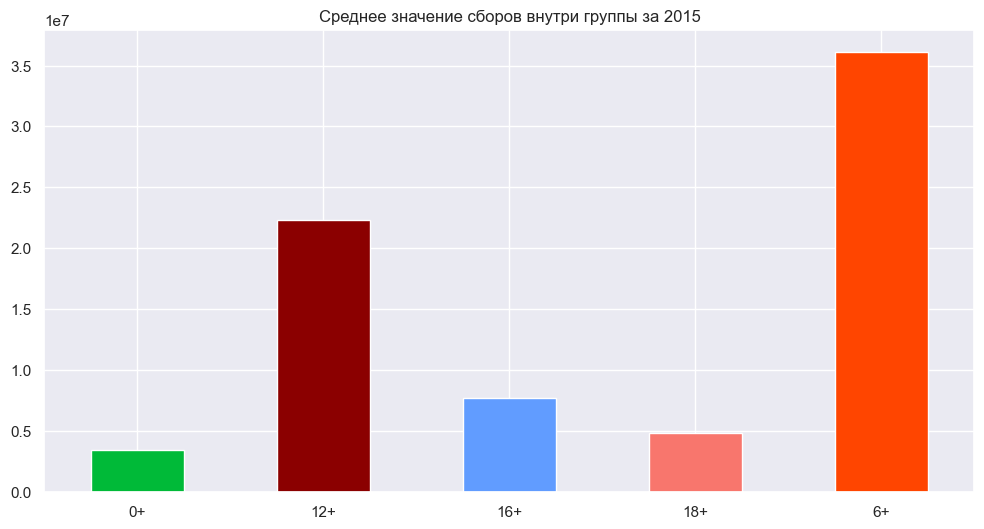

In [90]:
get_insight(args_for_pivot, df)

На графике видно что самое высокое значение боров по прежнему в категории `6+`

-------

In [91]:
args_for_pivot['query']['year'] = 2015
    
args_for_pivot['pivot_table']['func'] = ['sum','count']
        
args_for_pivot['plot']['title'] = 'Cумму сборов по возростным группам за'

,sum_box_office,count_values
age_rstrcn,,
0+,379046998,34
12+,13616054869,65
16+,11368084197,158
18+,5432280272,129
6+,8701792551,49


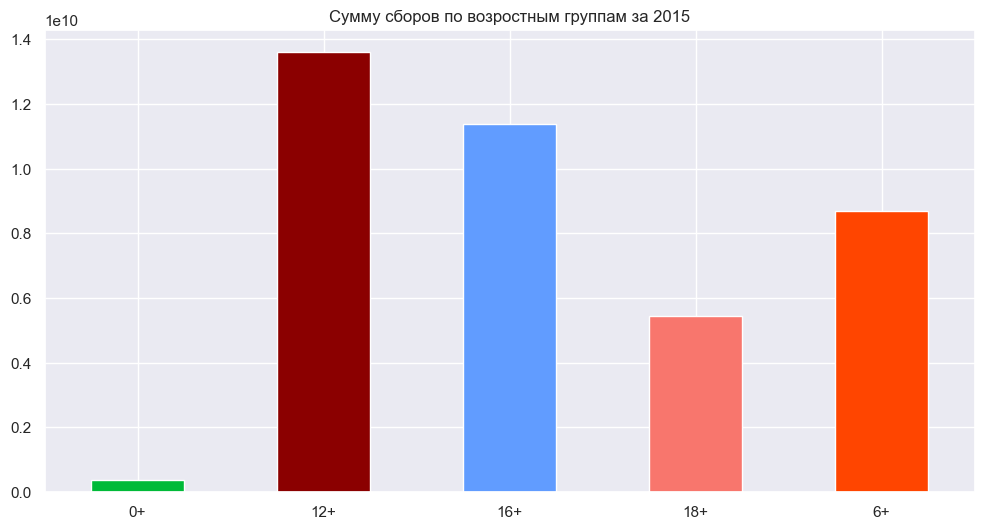

In [92]:
get_insight(args_for_pivot, df)

В `2015` году по сумме сборов лидирует группа `12+` за ней `16+` и `6+`

----------

In [93]:
args_for_pivot['query']['year'] = 2016
    
args_for_pivot['pivot_table']['func'] = ['median','count']   
    
args_for_pivot['plot']['title'] = 'Среднее значение сборов внутри группы за'

,median_box_office,count_values
age_rstrcn,,
0+,2955935,37
12+,9680744,77
16+,5667952,177
18+,7908410,144
6+,5484100,61


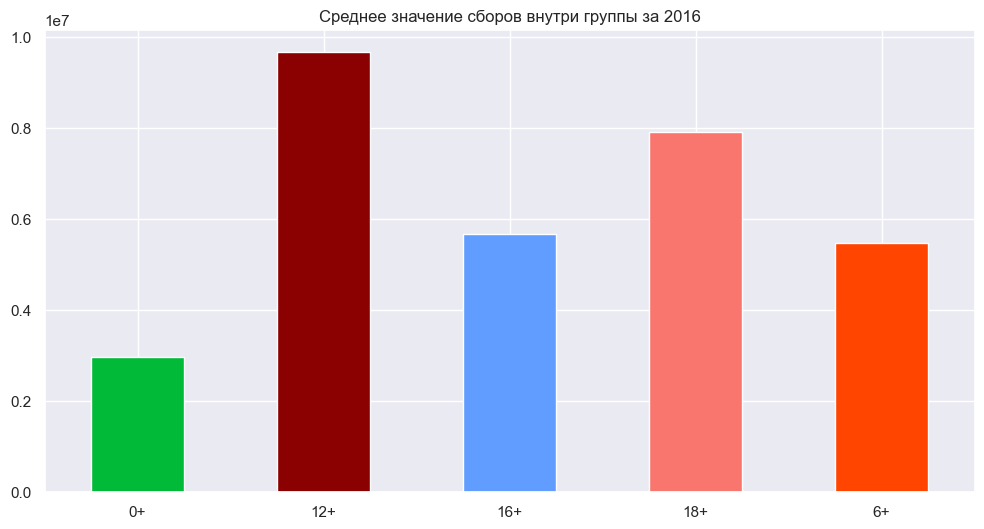

In [94]:
get_insight(args_for_pivot, df)

По графику видно что в `2016` году среднее значение сборов наиболее высокое в категории `12+`

------------

In [95]:
args_for_pivot['query']['year'] = 2016
   
args_for_pivot['pivot_table']['func'] = ['sum','count']
        
args_for_pivot['plot']['title'] = 'Cумму сборов по возростным группам за'

,sum_box_office,count_values
age_rstrcn,,
0+,150223459,37
12+,12204399514,77
16+,16664524417,177
18+,6793876529,144
6+,12053107938,61


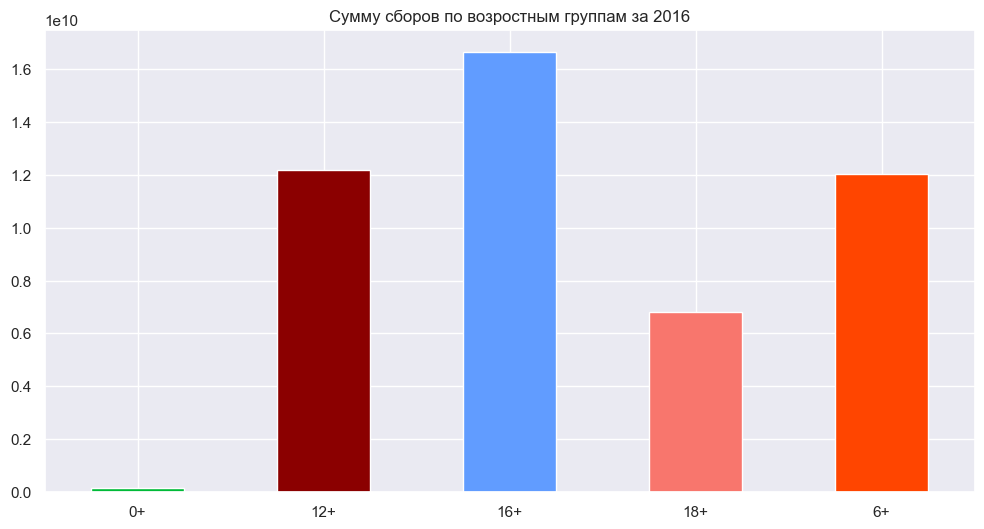

In [96]:
get_insight(args_for_pivot, df)

В `2016` году по сумме сборов лидирует группа `16+` за ней `12+` и `6+` 

---------

In [97]:
args_for_pivot['query']['year'] = 2017
    
args_for_pivot['pivot_table']['func'] = ['median','count']    
    
args_for_pivot['plot']['title'] = 'Среднее значение сборов внутри группы за'    

,median_box_office,count_values
age_rstrcn,,
0+,22178956,3
12+,13217268,40
16+,9702077,121
18+,8212677,147
6+,51992103,45


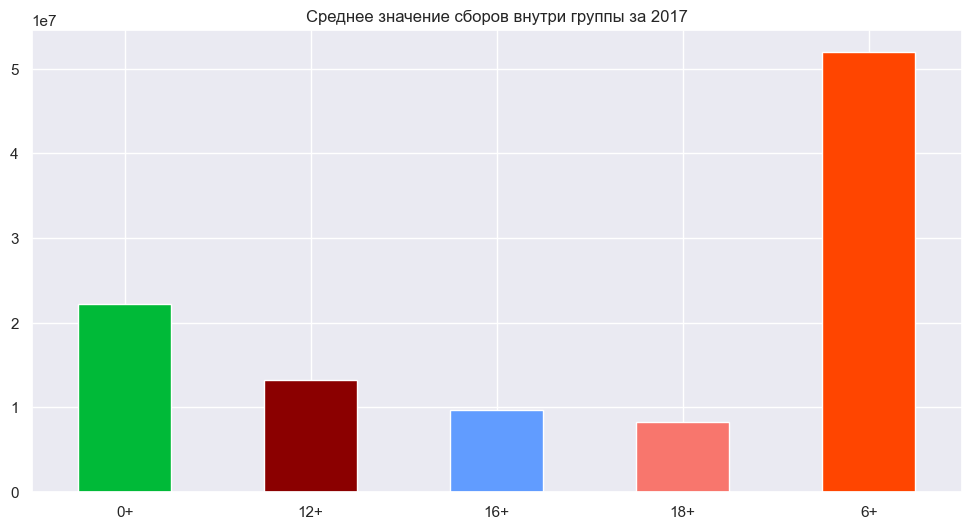

In [98]:
get_insight(args_for_pivot, df)

По графику видно что в `2017` году наиболее высокое среднее значение в категории `6+`

----------

In [99]:
args_for_pivot['query']['year'] = 2017
       
args_for_pivot['pivot_table']['func'] = ['sum','count']
        
args_for_pivot['plot']['title'] = 'Cумму сборов по возростным группам за'

,sum_box_office,count_values
age_rstrcn,,
0+,229598930,3
12+,7851419761,40
16+,18745042900,121
18+,9651495581,147
6+,12086142146,45


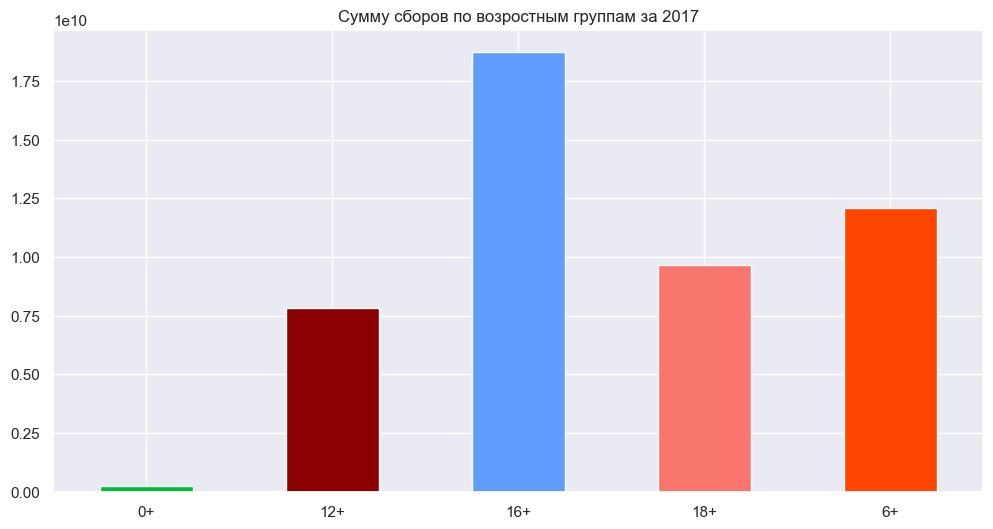

In [100]:
get_insight(args_for_pivot, df)

В `2017` году по сумме сборов лидирует группа `16+` за ней `6+` 

--------

In [101]:
args_for_pivot['query']['year'] = 2018
    
args_for_pivot['pivot_table']['func'] = ['median','count']   
    
args_for_pivot['plot']['title'] = 'Среднее значение сборов внутри группы за'    

,median_box_office,count_values
age_rstrcn,,
0+,3616937,5
12+,8931966,67
16+,9010639,156
18+,7179466,179
6+,14688850,68


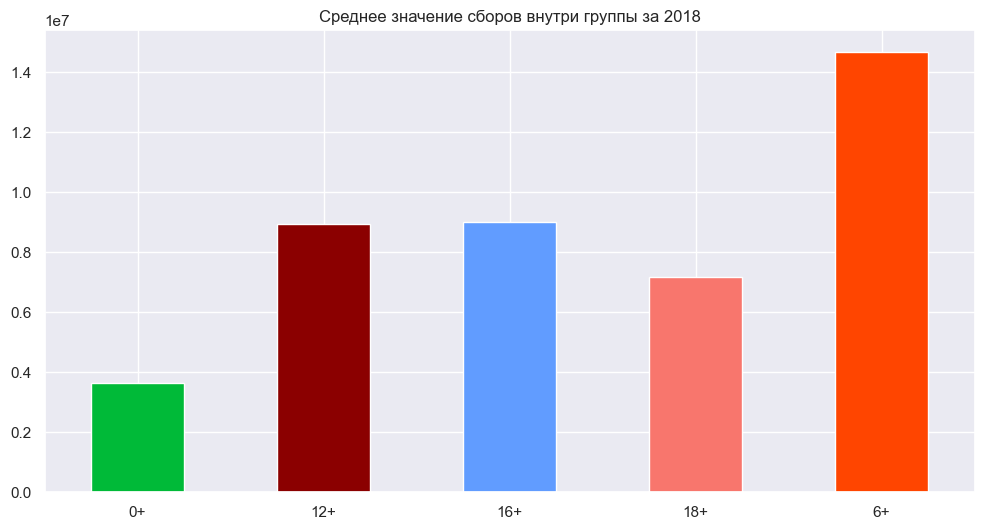

In [102]:
get_insight(args_for_pivot, df)

По графику видно что в `2018` году наиболее высокое среднее значение в категории `6+`

---------

In [103]:
args_for_pivot['query']['year'] = 2018
        
args_for_pivot['pivot_table']['func'] = ['sum','count']
        
args_for_pivot['plot']['title'] = 'Cумму сборов по возростным группам за'

,sum_box_office,count_values
age_rstrcn,,
0+,32449002,5
12+,14267291661,67
16+,16503602347,156
18+,8760085501,179
6+,10104974623,68


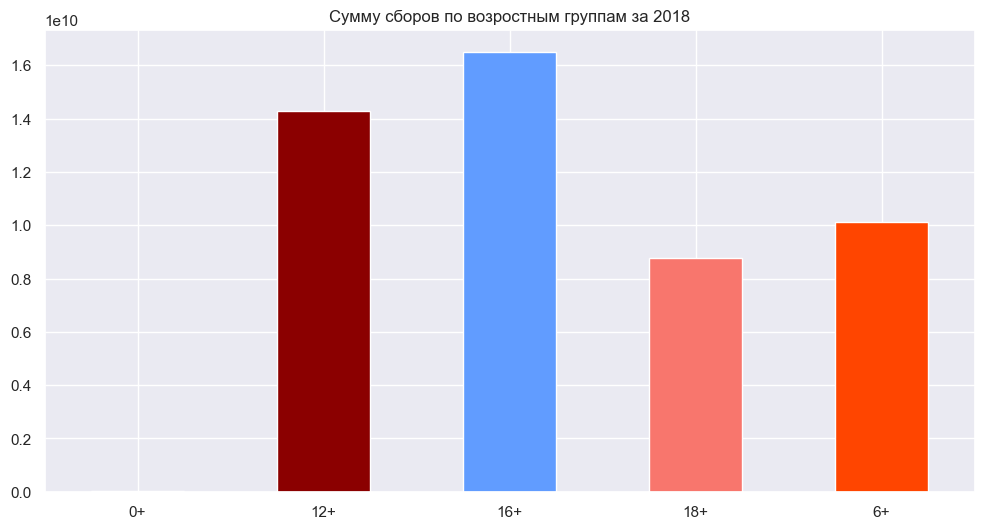

In [104]:
get_insight(args_for_pivot, df)

В `2018` году по сумме сборов лидирует группа `16+` за ней `12+` 

---------

In [105]:
args_for_pivot['query']['year'] = 2019
    
args_for_pivot['pivot_table']['func'] = ['median','count']    
    
args_for_pivot['plot']['title'] = 'Среднее значение сборов внутри группы за'    

,median_box_office,count_values
age_rstrcn,,
0+,3885434,3
12+,3498501,84
16+,3210718,178
18+,5603217,183
6+,14199615,80


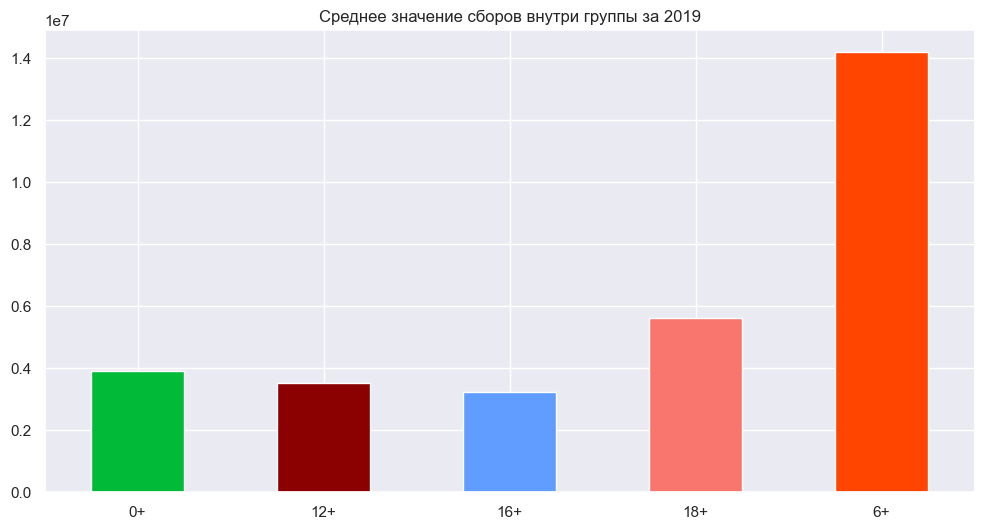

In [106]:
get_insight(args_for_pivot, df)

По графику видно что в `2019` году наиболее высокое среднее значение в категории `6+`

-------

In [107]:
args_for_pivot['query']['year'] = 2019
        
args_for_pivot['pivot_table']['func'] = ['sum','count']
        
args_for_pivot['plot']['title'] = 'Cумму сборов по возростным группам за'

,sum_box_office,count_values
age_rstrcn,,
0+,17746067,3
12+,12680191599,84
16+,12753418985,178
18+,10121796304,183
6+,12852544252,80


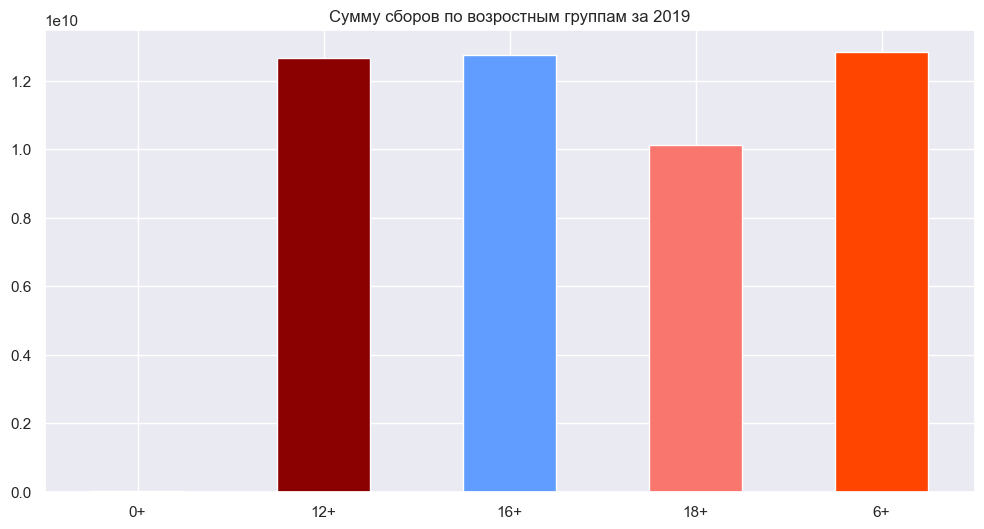

In [108]:
get_insight(args_for_pivot, df)

В `2015` году по сумме сборов лидирует группа `6+` за ней `16+` и `12+`

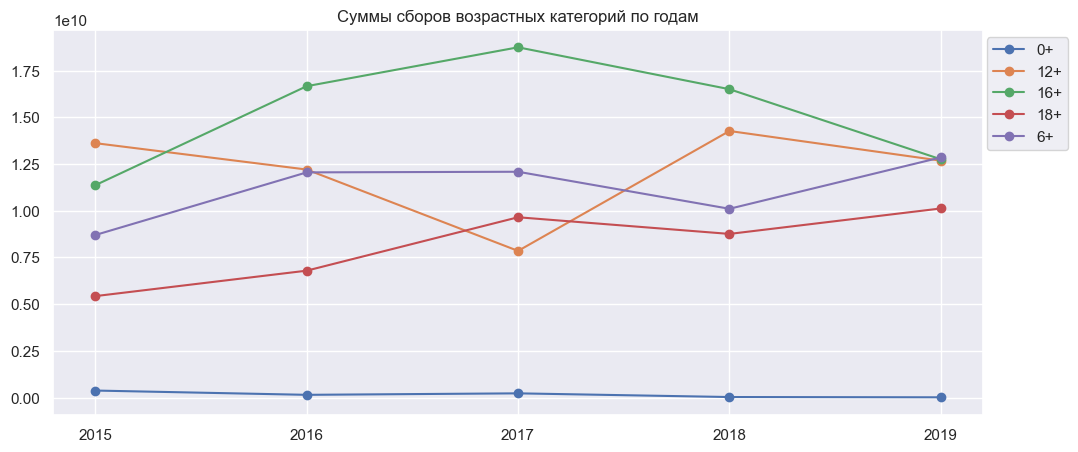

In [109]:
true_solution = df.query('year >= 2015').pivot_table(index='year', columns='age_rstrcn',values='box_office', aggfunc='sum')

true_solution.plot(
                                            kind='line', 
        
                                            figsize=(12, 5),
    
                                            style='o-',
        
                                            xlabel='',
        
                                            title= 'Суммы сборов возрастных категорий по годам',
    
                                            xticks=[2015,2016,2017,2018,2019]

)
plt.legend(bbox_to_anchor=(1.1,1), loc='upper right');

По графику выше видно что категория 0+ самая отстающая, тогда как группа 16+ лидирует почти на всем периоде. На графике также видно что в 2019 году группы 6+,16+,12+ имеют очень близкие по значению суммы. Группа 18+ имеет тенденцию роста но тем не менее отстает в большинстве случаев от тройки лидеров.

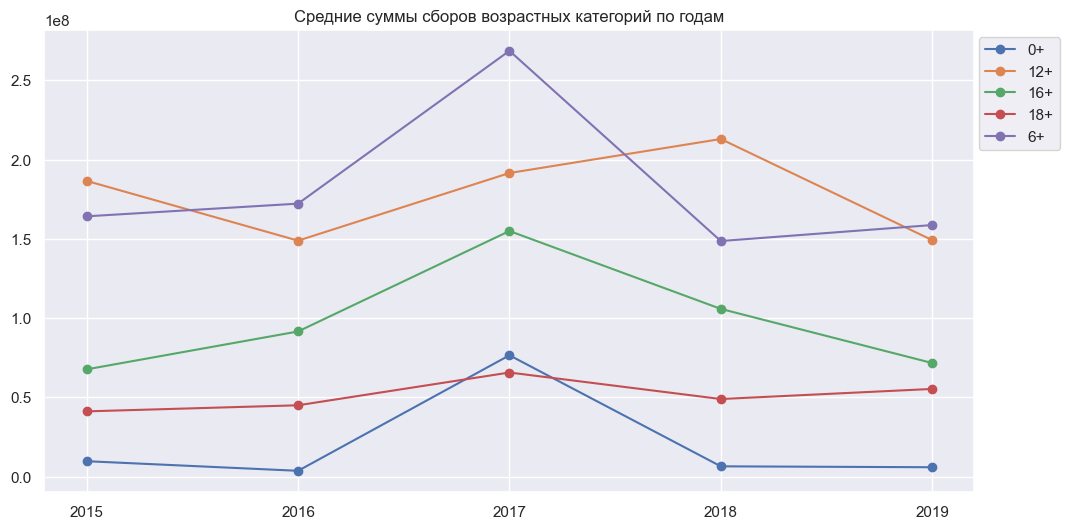

In [110]:
true_solution = df.query('year >= 2015').pivot_table(index='year', columns='age_rstrcn',values='box_office', aggfunc='mean')

true_solution.plot(
                                            kind='line', 
        
                                            figsize=(12, 6),
    
                                            style='o-',
        
                                            xlabel='',
        
                                            title= 'Cредние суммы сборов возрастных категорий по годам',
    
                                            xticks=[2015,2016,2017,2018,2019]

)
plt.legend(bbox_to_anchor=(1.1,1), loc='upper right');

Видно что категория 0+ самая отстающая, хотя в 2017 году наблюдается резкий рост, но затем такое же резкое падение.Группа 6+ и 16+ лидируют почти на всем периоде. Также видно заметное отставание группы 18+.

--------

В отношении средних значений кассовых сборов лидируют группы `6+` и `12+`. Скорее всего так происходит потому что дети такого возраста чаще всего ходят на фильмы не одни, но со своими родителями, соответственно большее количество человек платят за просмотр.

Что касается суммы сборов то в основном лидируют группы `16+`, `12+`, `6+`. Скорее всего на это влияет выход конкретных фильмов и стоимость просмотра в этих категориях, а также количество фильмов за год. Публика в этих возрастах намного шире чем в остальных, так как, в эти категории входят подростки, люди в этих категориях более осознаны, что позволяет им становиться фанатами.


-------

## Исследование фильмов с государственной поддержкой

Для получения ответа на вопрос, насколько зрителю интересны фильмы которые получили гос поддержку, было решено вывести 3 группы для сравнения. Сравнивать мы будем по рейтингу и сумме сборов.

Создадим новый столбец по принципу того как мы создали столбец с жанром, отделив главные страны(те которые пишутся первыми). Сделаем это с помощью написанной ранее функций concat и  `get_general`. Сразу постараемся привести все строки к одному внешнему виду.

In [111]:
concat = lambda name: name.split('-')  if type(name) == str else name

In [112]:
df['general_country'] = df['production_country'].apply(get_general)

In [113]:
df['general_country'] = df['general_country'].apply(lambda x: str.lower(x.strip()) if type(x) == str else x)

In [114]:
df['general_country'] = df['general_country'].replace(['сша','сща','cша'], 'сша')

In [115]:
df['general_country'].unique()

array(['сша', 'ссср', 'франция', 'германия', 'великобритания',
       'чехословакия', 'новая зеландия', 'канада', 'россия', 'гонконг',
       'ирландия', 'чехия', 'люксембург', 'япония', 'аргентина', 'дания',
       'австрия', 'италия', 'кнр', 'швеция', 'испания', 'мексика',
       'бразилия', 'чили', 'австралия', 'португалия', 'исландия',
       'южная корея', 'бельгия', 'украина', 'босния и герцеговина',
       'норвегия', 'швейцария', 'греция', 'норвения', 'грузия',
       'финляндия', 'израиль', 'иран', 'нидерланды',
       'республика узбекистан', 'турция', 'сербия', 'киргизия', 'индия',
       'польша', 'армения', 'юар', 'республика беларусь', 'румыния',
       'болгария', 'индонезия', 'таиланд', 'малайзия', 'азербайджан',
       'парагвай', 'уругвай', 'хорватия', 'венгрия', 'эстония',
       'венесуэла', 'македония', 'республика кипр', 'перу', 'китай', nan,
       'княжество андорра', 'республика казахстан', 'оаэ', 'корея',
       'голландия', 'литва', 'латвия', 'казахстан', 'ре

Первая группа это российские фильмы которые имеют господдержку, выходившие в прокат. `Russian film, received support, went to the cinema`, сократим до аббревиатуры `RF_SUP_WTC`

In [116]:
df['groups'] = (df
                    .query('general_country == "россия" and ~budget.isna() and box_office > @q ')
                
                    .apply(lambda x: 'RF_SUP_WTC',axis=1)
               )

In [117]:
df.query('groups == "RF_SUP_WTC"').shape[0]

313

Вторая группа это исключительно российские фильмы которые не имеют господдержки и выходили в прокат. Назовем их `RF_NOSUP_WTC`. Но для начала необходимо проверить наличие и количество фильмов по такой выборке.

In [118]:
df.query('general_country == "россия" and budget.isna() and box_office > @q').shape[0]

308

In [119]:
df.loc[df.groups.isna(),'groups'] = (df
                                         .query('general_country == "россия" and budget.isna() and box_office > @q')
                                     
                                         .apply(lambda x: 'RF_NOSUP_WTC',axis=1)
                                    )

In [120]:
df.query('groups == "RF_NOSUP_WTC"').shape[0]

308

Отметим третью группу это все не российские фильмы, не имеют поддержку, выходившие в прокат в России. Назовем их `OTHER_NOSUP_WTC`

In [121]:
df.loc[df.groups.isna(),'groups'] = (df
                                         .query('general_country != "россия"  and budget.isna() and box_office > @q')
                                     
                                         .apply(lambda x: 'OTHER_NOSUP_WTC',axis=1)
                                    )

In [122]:
df.query('groups == "OTHER_NOSUP_WTC"').shape[0]

1905

In [123]:
pivot_by_groups = df.pivot_table(index='groups', values=['ratings','box_office','puNumber'], aggfunc={'ratings':'median','box_office':'median','puNumber':'count'})

In [124]:
pivot_by_groups.columns = ['box_office_median','counts','ratings_median']

In [125]:
pivot_by_groups

,box_office_median,counts,ratings_median
groups,,,
OTHER_NOSUP_WTC,5667338,1905,6
RF_NOSUP_WTC,1569318,308,6
RF_SUP_WTC,16763623,313,6


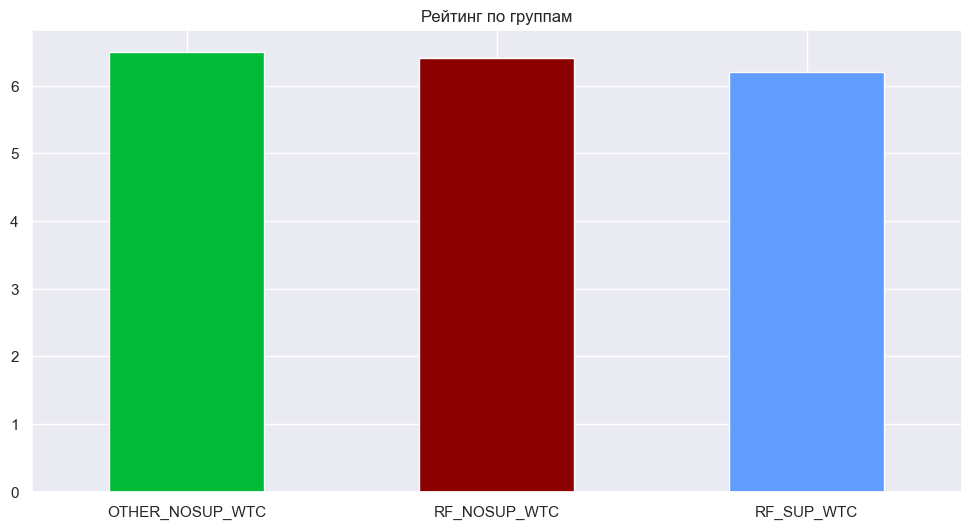

In [126]:
colors = ["#00ba38", "#8B0000", "#619cff"]
pivot_by_groups.ratings_median.plot(kind='bar', figsize=(12, 6),color = colors, rot=False, xlabel='',title='Рейтинг по группам');

Мы видим что у всех трех групп одинаковый рейтинг, фильмы с господдержкой не имеют преимуществ перед остальными. По долям зарубежные фильмы имеют выше рейтинг но российские не уступают.  В сводной можно увидеть небольшое количество российских фильмов.

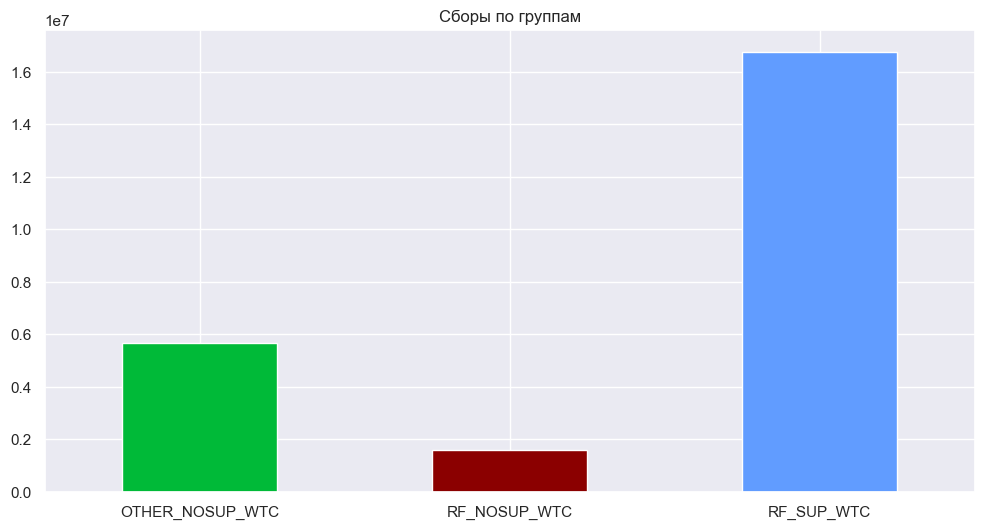

In [127]:
colors = ["#00ba38", "#8B0000", "#619cff"]
pivot_by_groups.box_office_median.plot(kind='bar', figsize=(12, 6),color = colors, rot=False, xlabel='',title='Сборы по группам');

По средней сумме сборов фильмы с господдержкой заметно лидируют.

Основываясь на рейтинге можно сделать вывод, что фильмы с гос поддержкой интересны зрителю не больше чем остальные фильмы, тогда как, по средней сумме сборов видно, что такие фильмы лидируют, это может говорить нам о том, что люди с большим желанием ходят на такие фильмы чем на все остальные.

----------

**Сумма средств господдержки по годам**

Строим сводную

In [128]:
pivot_total = df.query('~refundable_support.isna() and ~nonrefundable_support.isna()').pivot_table(index='year', values=['refundable_support','nonrefundable_support'], aggfunc='sum')

Выводим сумму в отдельный столбец

In [129]:
pivot_total['total'] = pivot_total['refundable_support']+pivot_total['nonrefundable_support']

In [130]:
pivot_total

,nonrefundable_support,refundable_support,total
year,,,
2013,134347945,0,134347945
2014,501002299,71000000,572002299
2015,3019088340,637153119,3656241459
2016,3381655482,921500000,4303155482
2017,2464624781,719346881,3183971662
2018,2784969465,662000000,3446969465
2019,3976000000,928000000,4904000000


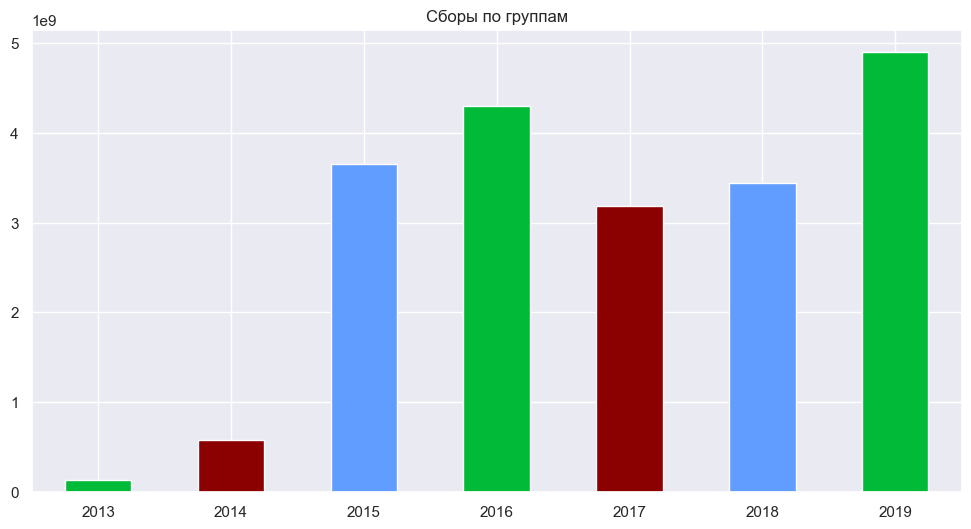

In [131]:
pivot_total.total.plot(kind='bar', figsize=(12, 6),color = colors, rot=False, xlabel='',title='Сборы по группам');

В сводной таблице выше видно сколько денег выделяют на поддержку кинематографа по годам. На графике видно уровень финансирования по годам.

-------

**Хорошо ли окупаются фильмы**

Создадим новый столбец и запишем туда результат вычисления. (Сборы - бюджет) / бюджет, таким образом мы получаем долю выручки от бюджета далее умножаем долю на 100 и получаем проценты окупаемости.

In [132]:
df['revenue'] = round( ((df['box_office'] - df['budget']) / df['budget'])* 100 ) 

In [133]:
df.loc[df.revenue == np.inf, 'revenue'] = np.nan

In [134]:
round(df.query('groups == "RF_SUP_WTC"').revenue.median())

-84

Видно что фильмы не окупаются, но стоит отметить что мы не принимаем во внимание то, что фильмы имеют невозвратную господдержку. Ниже можно увидеть рейтинг таких фильмов.

In [135]:
round(df.query('groups == "RF_SUP_WTC"').ratings.mean(), 2)

6.04

---------

**Тренд по типу и жанру**

Изменим функцию `get_insight`. Теперь она будет строить график по средним значениям рейтинга за период с `2015` по `2019` года. Рейтинг будет считаться по типу и по жанру.

In [136]:
args = {
                  'query':{
                                'target': None, # data for calculations
                      },
                  
                  'pivot_table':{
                                    'idx':    None, # arg index
                                    'vals':   None, # arg value
                                    'func':   None  # mentod for arg aggfunc
                      },
    
                  'plot':{
                              'title':        None,  # name of plot
                              'name':         ''     # name of plot 
                      
                      }
                 }


In [137]:
def get_trend(args, df):
    
    q_target       =      args['query']['target']     # data for calculations
    
    
    p_index        =      args['pivot_table']['idx']  # arg index
    
    p_value        =      args['pivot_table']['vals'] # arg value
    
    p_agfunc       =      args['pivot_table']['func'] # mentod for arg aggfunc
    
    pl_name        =      args['plot']['name']        # name target     
    
    pl_title       =      args['plot']['title']       # name of plot 
    
    
    #get pivot table
    pivot = (df
                .query(q_target)
             
                .pivot_table(
                                index = p_index, 
                    
                                values = p_value,
                    
                                aggfunc = p_agfunc
                            )
            )
    
    #change column name
    pivot.columns = [p_agfunc + '_' + p_value]
    
    pivot = pivot.sort_values(by=p_agfunc + '_'+ p_value,ascending=False)
    
    colors = [
                "#619cff", 
                "#f8766d", 
                "#FF4500"
            ]


    #building the plot
    pivot[p_agfunc + '_'+ p_value].plot(
                                            kind='barh', 
        
                                            figsize=(12, 6),
        
                                            color=colors,
        
                                            rot=0,
        
                                            xlabel='',
        
                                            title= '{0} {1} за период  2015-2019'.format(pl_title,pl_name)
    );
        
                      

In [138]:
#here we enter params

args['query']['target'] = '~box_office.isna() and year >= 2015'
    
    
args['pivot_table']['idx'] = 'general_genre'
    
args['pivot_table']['vals'] = 'ratings'
    
args['pivot_table']['func'] = 'median'
    
    
args['plot']['title'] = 'Популярность жанров'


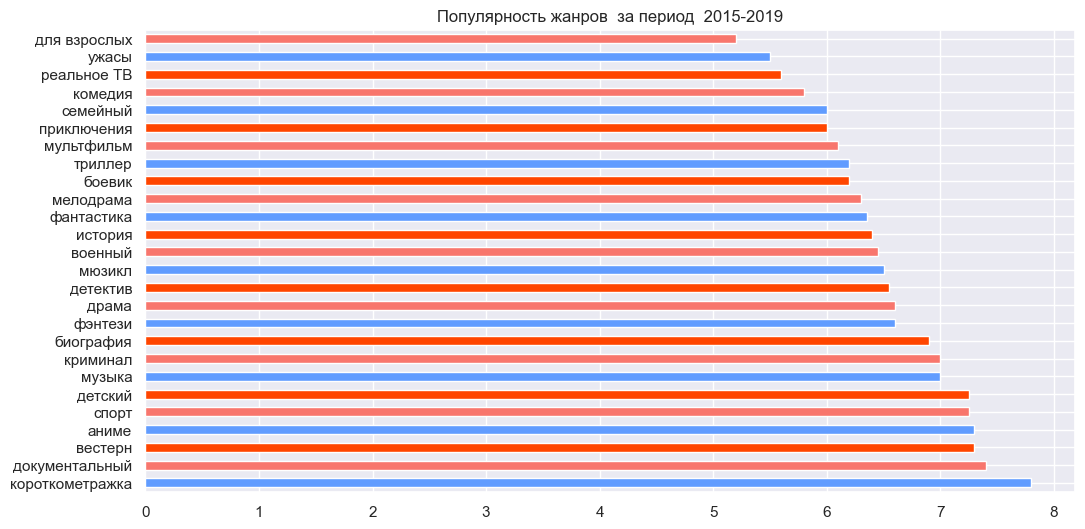

In [139]:
get_trend(args, df)

По графику можно отметить особенно популярные жанры фильмов такие как, `короткометражка`, `аниме`, `вестерн`, `детский`, `документальный`, `спорт`. Это те фильмы рейтинг которых в среднем был выше `7`, за период с `2015-2019` года.

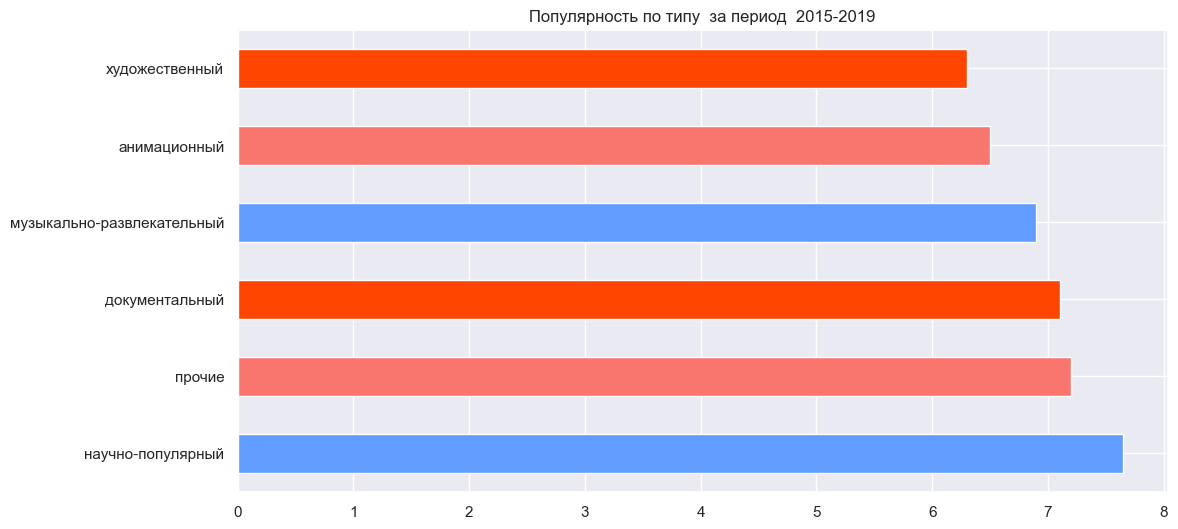

In [140]:
args['pivot_table']['idx'] = 'type'
    
args['plot']['title'] = 'Популярность по типу'

get_trend(args, df)

По графику можно отметить 3 типа фильмов рейтинг которых был выше 7 за период с `2015-2019` года, это `документальный`, `научно-популярный`, `прочее`.

Ниже мы увидим количество российских фильмов с 2015 которые, имеют господдержку. Второй график нам показывает количество иностранных фильмов.

In [141]:
counts = df.query('box_office > @q and ~budget.isna() and year >= 2015').pivot_table(index=['age_rstrcn'], values=['puNumber', ], aggfunc={'puNumber':'count'})

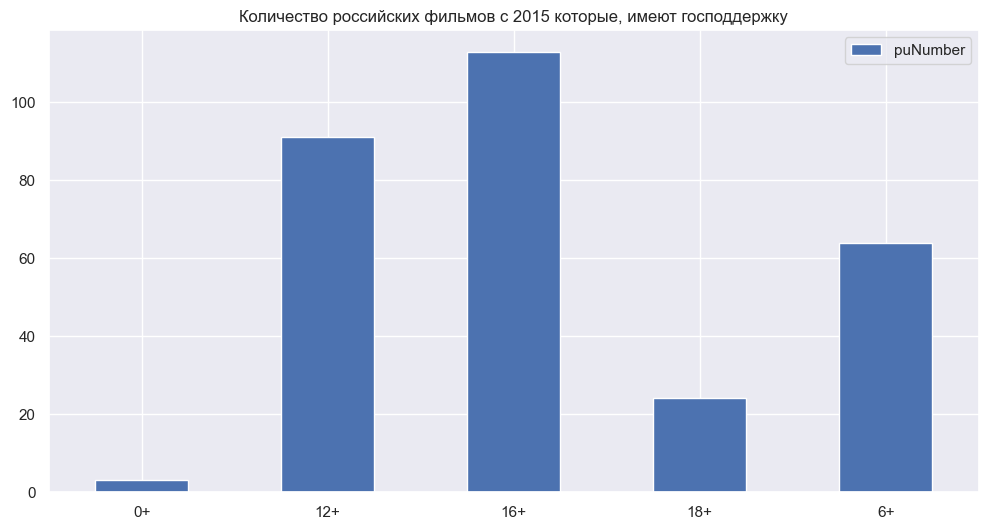

In [142]:
counts.plot(
                                            kind='bar', 
        
                                            figsize=(12, 6),
        
                                            rot=False, 
        
                                            xlabel='',
        
                                            title= 'Количество российских фильмов с 2015 которые, имеют господдержку'
    );

In [143]:
counts = df.query('box_office > @q and budget.isna() and general_country != "россия" and year >= 2015').pivot_table(index=['age_rstrcn'], values=['puNumber', ], aggfunc={'puNumber':'count'})

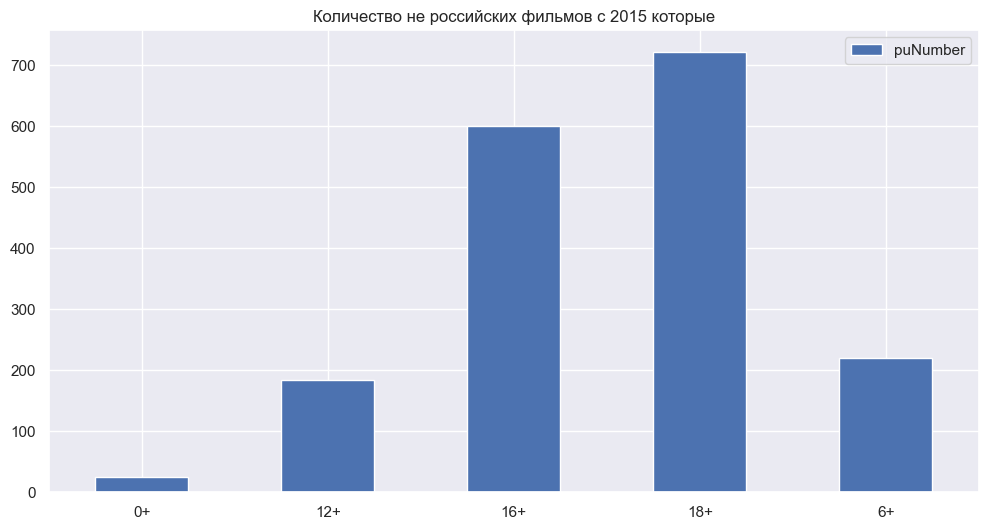

In [144]:
counts.plot(
                                            kind='bar', 
        
                                            figsize=(12, 6),
        
                                            rot=False, 
        
                                            xlabel='',
        
                                            title= 'Количество не российских фильмов с 2015 которые'
    );

Можно сделать вывод что российскому кино необходимо выпускать на порядок больше фильмов для развития.

Мы увидели что, фильмы с гос поддержкой не имеют преимуществ перед остальными в рейтинге, что говорит о том что господдержка не влияет на качество фильмов. Также мы увидели что российские фильмы сильно уступают в количестве зарубежным фильмам. 
Стало ясно, что по средней сумме сборов, фильмы с гос поддержкой, собирают денег  больше остальных.  
Также были выявлены жанры фильмов которые наиболее интересны зрителю среди всех остальных. Это  короткометражка, аниме, вестерн, детский, документальный, спорт

-----

## Вывод

В ходе анализа мы объединили два даты фрейма, избавились от неявных дубликатов в данных. Изучили категориальные значения во всех столбцах и обнаружили общую проблему которая заключается в том что во всех столбцах присутствуют символы в разном регистре, лишние пробелы, а также формат записей отличается. Также мы добавили новые столбцы выделив основные жанры, главных режиссеров, год выпуска и подсчитав долю гос поддержки от общего бюджета.
Определили что доля фильмов с указанной информацией о проекте составляет 0.42. Самое большое количество фильмов вышло в 2019 году, это 530 картин, тогда как в 2010 всего 105. В каком году сумма сборов была минимальной и максимальной. Минимальная сумма сборов в `2010` году, максимальная в `2018` году.

В ходе анализа мы выяснили какие возрастные категории имеют наибольшее среднее значение кассовых сборов за период с `2015`по `2019`, это группы 6+ и 12+. Также мы выяснили что эти категории лидируют в отношении суммы сборов, к ним добавляется  категория 16+.

Мы выяснили что  российские фильмы не уступают зарубежным по рейтингу и имеют рейтинг в среднем 6. Увидели что наибольшие сборы у российских фильмов с государственной поддержкой. Мы можем сделать вывод, что российские фильмы с гос поддержкой интересны зрителю. Но такие фильмы не окупаются.  Причиной этому может быть низкий уровень финансирования и как следствие низкое качество. А также увидели заметно небольшое количество российских фильмов вышедших в прокат, следовательно, необходимо развивать индустрию, выпускать больше фильмов, и популяризировать кино.

Были выявлены жанры фильмов которые больше всего интересны зрителям, это короткометражка, аниме, вестерн, детский, документальный, спорт, в эти жанры можно вкладывать больше инвестиций для повышения популярности российского кино.


--------